Sales Performance Analysis for E-commerce

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_rows = 200

# Generate random data
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=np.random.randint(0, 730)) for _ in range(num_rows)]
categories = ["Electronics", "Clothing", "Home Decor", "Beauty", "Sports"]
products = {
    "Electronics": ["Smartphone", "Laptop", "Headphones", "Smartwatch", "Tablet"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Dress", "Sneakers"],
    "Home Decor": ["Lamp", "Curtains", "Cushion", "Wall Clock", "Vase"],
    "Beauty": ["Perfume", "Lotion", "Lipstick", "Shampoo", "Face Cream"],
    "Sports": ["Football", "Tennis Racket", "Yoga Mat", "Dumbbells", "Cycling Helmet"]
}
regions = ["North", "South", "East", "West"]

data = []
for _ in range(num_rows):
    category = random.choice(categories)
    product = random.choice(products[category])
    quantity = np.random.randint(1, 10)
    unit_price = round(np.random.uniform(10, 500), 2)
    total = round(quantity * unit_price, 2)
    profit = round(total * np.random.uniform(0.05, 0.3), 2)
    region = random.choice(regions)
    
    data.append([
        f"ORD-{np.random.randint(1000,9999)}",
        random.choice(dates),
        product,
        category,
        quantity,
        unit_price,
        total,
        profit,
        region
    ])

# Create DataFrame
columns = ["Order ID", "Date", "Product", "Category", "Quantity", "Unit Price", "Total", "Profit", "Region"]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
file_path = "/mnt/data/ecommerce_sales_data.csv"
df.to_csv("sales_data.csv", index=False)

file_path


'/mnt/data/ecommerce_sales_data.csv'

In [25]:
# 🧹 STEP 2: Data Cleaning + Accuracy Validation

import pandas as pd
import numpy as np

# -------------------------------
# 1️⃣ Load the dataset
# -------------------------------
df = pd.read_csv("sales_data.csv")

print("📦 Initial Dataset Info:")
print(df.info(), "\n")

# -------------------------------
# 2️⃣ Standardize column names
# -------------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:", df.columns.tolist(), "\n")

# -------------------------------
# 3️⃣ Convert data types safely
# -------------------------------
# Convert date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert numeric columns
numeric_cols = ["quantity", "unit_price", "total", "profit"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# -------------------------------
# 4️⃣ Drop invalid or missing rows
# -------------------------------
before_rows = len(df)
df.dropna(subset=["date", "product", "total", "profit"], inplace=True)
after_rows = len(df)
print(f"🧹 Dropped {before_rows - after_rows} invalid rows (missing key fields)\n")

# -------------------------------
# 5️⃣ Feature engineering: add Month & Year
# -------------------------------
df["month"] = df["date"].dt.strftime("%b")
df["year"] = df["date"].dt.year

# -------------------------------
# 6️⃣ Recalculate revenue for consistency
# -------------------------------
df["revenue"] = df["quantity"] * df["unit_price"]

# -------------------------------
# 7️⃣ 🔍 Data Accuracy Validation Checks
# -------------------------------

print("🔎 Running Data Accuracy Validation...\n")

# Check for missing values
missing = df.isnull().sum()
print("Missing Values per Column:")
print(missing, "\n")

# Check for duplicates
duplicates = df.duplicated(subset="order_id").sum()
print(f"Duplicate Order IDs: {duplicates}\n")

# Check for negative or zero values
invalid_values = df[(df["quantity"] <= 0) | (df["unit_price"] <= 0) | (df["total"] <= 0)]
print(f"Invalid rows (zero or negative sales values): {len(invalid_values)}\n")

# Check Revenue consistency
df["calc_revenue"] = df["quantity"] * df["unit_price"]
revenue_mismatch = df[abs(df["revenue"] - df["calc_revenue"]) > 0.01]
print(f"Rows with Revenue mismatch: {len(revenue_mismatch)}\n")

# Check Profit sanity (profit should not exceed total)
excess_profit = df[df["profit"] > df["total"]]
print(f"Rows where profit > total: {len(excess_profit)}\n")

# Check date range
print(f"Date Range: {df['date'].min().date()} → {df['date'].max().date()}\n")

# Check category and product combinations
category_product_check = df.groupby("category")["product"].nunique()
print("Unique products per category:\n", category_product_check, "\n")

# Quick numeric summary
print("📊 Summary Statistics:")
print(df[["quantity", "unit_price", "total", "profit", "revenue"]].describe(), "\n")

# -------------------------------
# 9️⃣ Save cleaned dataset
# -------------------------------
df.drop(columns=["calc_revenue"], inplace=True)
df.to_csv("ecommerce_sales_data_cleaned.csv", index=False)
print("\n💾 Cleaned & validated data saved as 'ecommerce_sales_data_cleaned.csv'")


📦 Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    200 non-null    object 
 1   Date        200 non-null    object 
 2   Product     200 non-null    object 
 3   Category    200 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Unit Price  200 non-null    float64
 6   Total       200 non-null    float64
 7   Profit      200 non-null    float64
 8   Region      200 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.2+ KB
None 

✅ Column names standardized: ['order_id', 'date', 'product', 'category', 'quantity', 'unit_price', 'total', 'profit', 'region'] 

🧹 Dropped 0 invalid rows (missing key fields)

🔎 Running Data Accuracy Validation...

Missing Values per Column:
order_id      0
date          0
product       0
category      0
quantity      0
unit_price    0
total       

Columns in dataset:
 ['order_id', 'date', 'product', 'category', 'quantity', 'unit_price', 'total', 'profit', 'region', 'month', 'year', 'revenue']

Normalized Columns:
 ['Order_Id', 'Date', 'Product', 'Category', 'Quantity', 'Unit_Price', 'Total', 'Profit', 'Region', 'Month', 'Year', 'Revenue']

Possible date columns: ['Date']


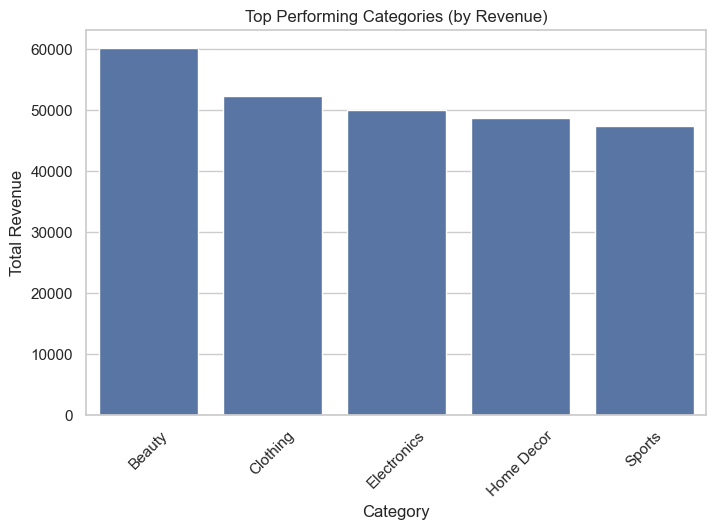

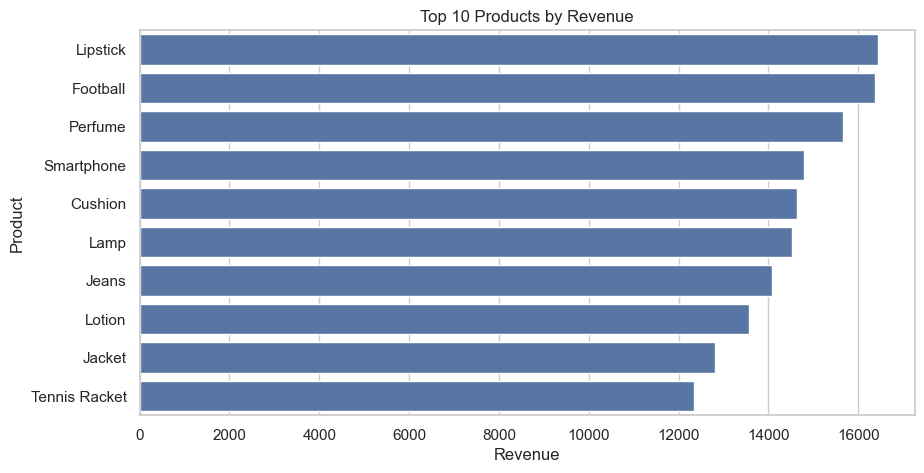

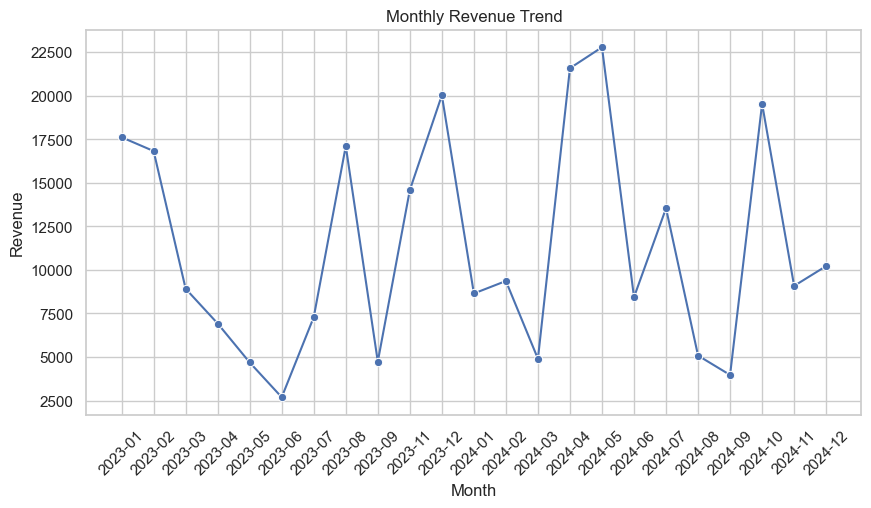

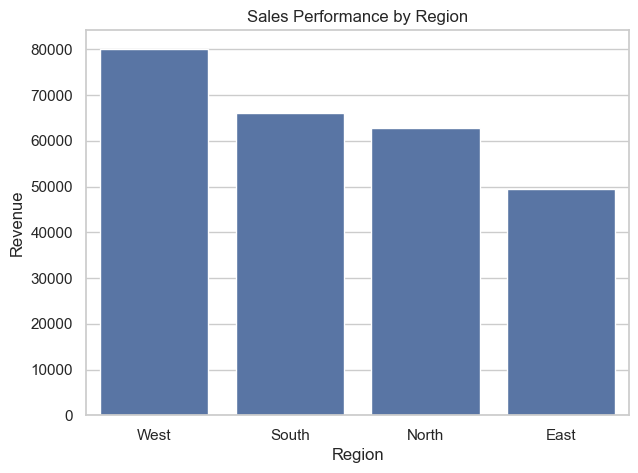

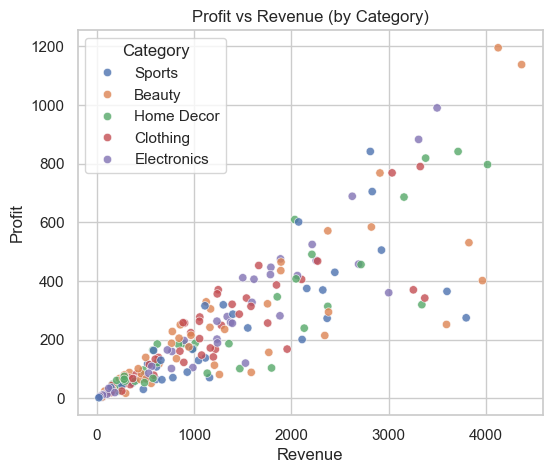

📈 KPI SUMMARY
Total Revenue: $258,559.32
Total Profit: $48,188.81
Average Profit Margin: 18.64%
Top Category: Beauty
Best-Selling Product: Lipstick

✅ Analysis completed successfully!


In [26]:
# 📊 STEP 3: Data Analysis & Visualization

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("ecommerce_sales_data_cleaned.csv")

# 🩺 FIX: Normalize and detect column names
print("Columns in dataset:\n", df.columns.tolist())

# Clean column names
df.columns = df.columns.str.strip().str.title()
print("\nNormalized Columns:\n", df.columns.tolist())

# Try to detect the correct Date column
possible_date_cols = [col for col in df.columns if "date" in col.lower()]
print("\nPossible date columns:", possible_date_cols)

if "Date" not in df.columns and possible_date_cols:
    df.rename(columns={possible_date_cols[0]: "Date"}, inplace=True)

# Convert Date column to datetime (ignore errors)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Set plot style
sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Top-Performing Categories
# -------------------------
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Top Performing Categories (by Revenue)")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# 2️⃣ Top 10 Products by Revenue
# -------------------------
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

# -------------------------
# 3️⃣ Monthly Revenue Trend
# -------------------------
df["Month_Year"] = df["Date"].dt.to_period("M").astype(str)
monthly_sales = df.groupby("Month_Year")["Revenue"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x="Month_Year", y="Revenue", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# 4️⃣ Regional Sales Performance
# -------------------------
region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales Performance by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()

# -------------------------
# 5️⃣ Profit vs Revenue Relationship
# -------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="Revenue", y="Profit", hue="Category", alpha=0.8)
plt.title("Profit vs Revenue (by Category)")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.show()

# -------------------------
# 6️⃣ KPI Summary
# -------------------------
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum()
top_category = category_sales.idxmax()
best_product = top_products.index[0]
avg_profit_margin = round((total_profit / total_revenue) * 100, 2)

print("📈 KPI SUMMARY")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin}%")
print(f"Top Category: {top_category}")
print(f"Best-Selling Product: {best_product}")
print("\n✅ Analysis completed successfully!")
